## PRÉTRAITEMENT DES DONNÉES

In [2]:
# Importation des bibs 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ===  CHARGEMENT DES DONNÉES ===
print(" Chargement des données...")
file_path = r"C:\Users\VECTUS\DL_For_SOC_Estimation\datasets\concat_data.csv"
df = pd.read_csv(file_path, delimiter=",")

 Chargement des données...


In [4]:
# === PRÉTRAITEMENT DES DONNÉES ===
print("=== Nettoyage des données ===")
print(f"Dimensions initiales : {df.shape}")

# Suppression doublons si existent

df.drop_duplicates(inplace=True)  # pas de lignes dupliques 

print(f"Dimensions après nettoyage : {df.shape}")

# Vérification des valeurs manquantes après suppression
print("Valeurs manquantes par colonne après nettoyage :")
print(df.isnull().sum())

#df.dropna(inplace=True) == pas besoin car pas de missing values

=== Nettoyage des données ===
Dimensions initiales : (1267, 8)
Dimensions après nettoyage : (1267, 8)
Valeurs manquantes par colonne après nettoyage :
Heure          0
Courant        0
Tension        0
Cellule_min    0
Cellule_max    0
Temp1          0
Temp4          0
SOC            0
dtype: int64


In [5]:
# Sélection des features et de la cible
features = ["Courant", "Tension", "Cellule_min", "Cellule_max", "Temp1", "Temp4"]
target = "SOC"

# Normalisation
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Vérification des valeurs après normalisation
print("\nStatistiques après normalisation :")
print(df[features].describe())


Statistiques après normalisation :
           Courant       Tension   Cellule_min   Cellule_max         Temp1  \
count  1267.000000  1.267000e+03  1.267000e+03  1.267000e+03  1.267000e+03   
mean      0.000000 -4.486458e-16  5.832395e-16 -2.512416e-15  1.704854e-15   
std       1.000395  1.000395e+00  1.000395e+00  1.000395e+00  1.000395e+00   
min      -1.286870 -1.079098e+00 -1.002163e+00 -1.014174e+00 -5.836659e-01   
25%      -0.656100 -7.696675e-01 -6.848862e-01 -6.871897e-01 -5.836659e-01   
50%      -0.362382 -6.149525e-01 -5.406697e-01 -5.385606e-01 -5.836659e-01   
75%       1.380663  1.241628e+00  1.326934e+00  1.311872e+00  9.133072e-01   
max       1.765866  1.860488e+00  1.853325e+00  1.869231e+00  2.410280e+00   

              Temp4  
count  1.267000e+03  
mean  -2.377823e-15  
std    1.000395e+00  
min   -5.923654e-01  
25%   -5.923654e-01  
50%   -5.923654e-01  
75%    1.194604e+00  
max    2.981572e+00  


<Figure size 1200x600 with 0 Axes>

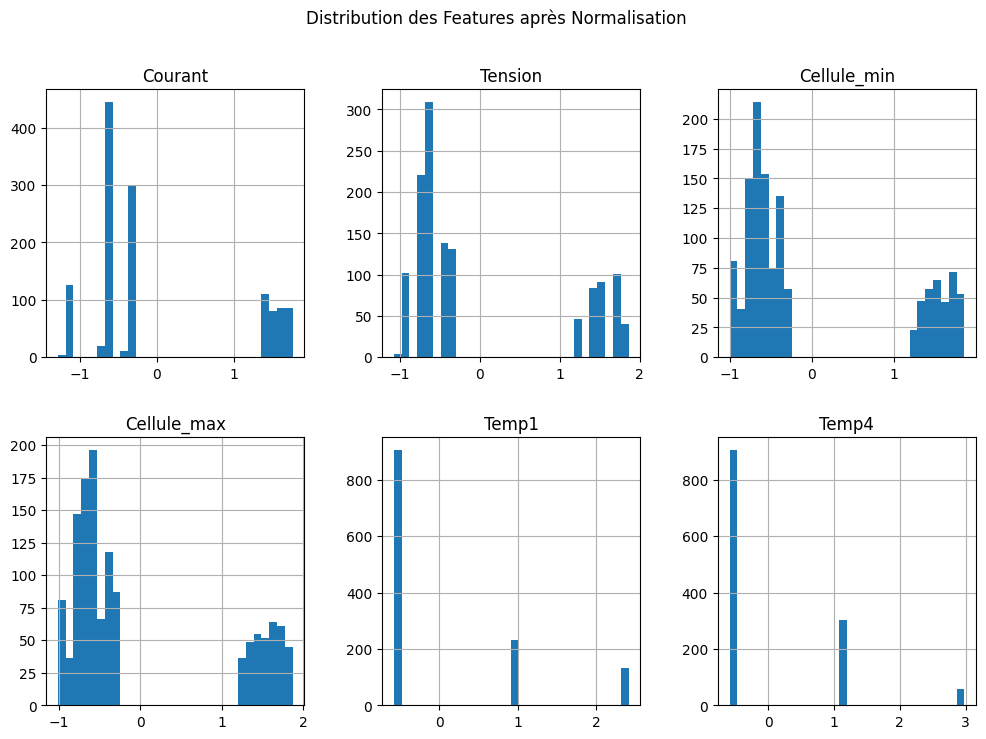


 Données prétraitées enregistrées avec succès !


In [7]:
# Visualisation de la distribution des features après normalisation
plt.figure(figsize=(12, 6))
df[features].hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distribution des Features après Normalisation")
plt.show()

# Enregistrement du dataset prétraité
preprocessed_path = r"C:\Users\VECTUS\DL_For_SOC_Estimation\datasets\preprocessed_dataset.csv"
df.to_csv(preprocessed_path, index=False)
print("\n Données prétraitées enregistrées avec succès !")
